# Learning ```species``` Notebook 1

## A gentle introduction to ```species```

```species``` is well documented already, with a number of clear examples available online at https://species.readthedocs.io/

Here, I hope to introduce how to handle importing and using species. We will initialize a database, one of the main components of the ```species``` workflow, add the components of data we are interested in analyzing, and set up a forward model grid fit for the planet. I will demonstrate on YSES 1c planet, which is included in the default ```species``` database under the name "TYC 8988 C"

In [1]:
# imports 

import urllib.request
import species


In [2]:
# this line initializes species, creating a database.hdf5 file and the species file structure
species.SpeciesInit()

Initiating species v0.4.0... [DONE]
Database: /Users/wbalmer/retrievepsig/species_database.hdf5
Data folder: /Users/wbalmer/retrievepsig/data
Working folder: /Users/wbalmer/retrievepsig


In [3]:
# this is the important line, we create a variable named "database"
database = species.Database()

In [36]:
# we next want to import a grid of forward models. species has a number available: 
# https://species.readthedocs.io/en/latest/overview.html#supported-data
# lets test the drift phonenix models
model_name = 'drift-phoenix'
database.add_model(model=model_name, teff_range=(1000., 1500.))

Unpacking DRIFT-PHOENIX model spectra (229 MB)... [DONE]
Please cite Helling et al. (2008) when using DRIFT-PHOENIX in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2008ApJ...675L.105H/abstract
Wavelength range (um) = 0.1 - 50
Spectral resolution = 4000
Teff range (K) = 1000.0 - 1500.0
Adding DRIFT-PHOENIX model spectra... [DONE]                                            
Grid points stored in the database:
   - Teff = [1000. 1100. 1200. 1300. 1400. 1500.]
   - log(g) = [3.  3.5 4.  4.5 5.  5.5]
   - [Fe/H] = [-0.6 -0.3 -0.   0.3]


In [37]:
# then we will add the archived photometry on YSES 1c to our database object using the "add_companion" function
database.add_companion(name='TYC 8988 C')

Adding object: TYC 8988 C
   - Distance (pc) = 94.60 +/- 0.30
   - Paranal/SPHERE.IRDIS_D_Y23_3:
      - Apparent magnitude = 22.37 +/- 0.31
      - Flux (W m-2 um-1) = 5.70e-18 +/- 1.65e-18
   - Paranal/SPHERE.IRDIS_D_J23_2:
      - Apparent magnitude = 21.81 +/- 0.22
      - Flux (W m-2 um-1) = 6.98e-18 +/- 1.42e-18
   - Paranal/SPHERE.IRDIS_D_J23_3:
      - Apparent magnitude = 21.17 +/- 0.15
      - Flux (W m-2 um-1) = 9.68e-18 +/- 1.34e-18
   - Paranal/SPHERE.IRDIS_D_H23_2:
      - Apparent magnitude = 19.78 +/- 0.08
      - Flux (W m-2 um-1) = 1.60e-17 +/- 1.18e-18
   - Paranal/SPHERE.IRDIS_D_H23_3:
      - Apparent magnitude = 19.32 +/- 0.06
      - Flux (W m-2 um-1) = 2.08e-17 +/- 1.15e-18
   - Paranal/SPHERE.IRDIS_D_K12_1:
      - Apparent magnitude = 18.34 +/- 0.04
      - Flux (W m-2 um-1) = 2.24e-17 +/- 8.26e-19
   - Paranal/SPHERE.IRDIS_D_K12_2:
      - Apparent magnitude = 17.85 +/- 0.09
      - Flux (W m-2 um-1) = 2.72e-17 +/- 2.25e-18
   - Paranal/SPHERE.IRDIS_B_H:
    

In [38]:
# there are other ways to use the "add_companion" function, but we will first fit a model to the photometry
fit = species.FitModel(object_name='TYC 8988 C',
                       model=model_name, # set the model to fit to
                       bounds={'radius':(0.9,1.5)}, # you can set bounds on various parameters for the forward model
                       inc_phot=True, # you can also pass a list of photometric points to include, instead of all available
                       inc_spec=False, # once we import spectra to our database, we will set this to True
                       weights=None)

Getting object: TYC 8988 C... [DONE]
Interpolating Paranal/NACO.Lp... [DONE]
Interpolating Paranal/SPHERE.IRDIS_B_H... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_H23_3... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_J23_2... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_J23_3... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_K12_2... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_Y23_3... [DONE]
Fitting 4 parameters:
   - teff
   - logg
   - feh
   - radius
Prior boundaries:
   - radius = (0.9, 1.5)
   - teff = (1000.0, 1500.0)
   - logg = (3.0, 5.5)
   - feh = (-0.6, 0.3)
Weights for the log-likelihood function:
   - Paranal/NACO.Lp = 1.00e+00
   - Paranal/SPHERE.IRDIS_B_H = 1.00e+00
   - Paranal/SPHERE.IRDIS_D_H23_2 = 1.00e+00
   - Paranal/SPHERE.IRDIS_D_H23_3 = 1.00e+00
   - Paranal/SPHERE.IRDIS_D_J23_2 = 1.00e+00
   - Paranal/SPHERE.IRDIS_D_J23_3 = 1.00e+00
   - Paranal/SPHERE.IRDIS_D_

In [39]:
tag='yses1c' # we set some name for this sampling run

In [52]:
# this cell runs the nested sampler
fit.run_ultranest(tag=tag, # we set some name for this sampling run
                  min_num_live_points=300, # we set the "resolution" of our nested sampler -> lower points will run faster, but miss areas of parameter space!
                  output='ultranest', # we specify where the output of the nested sampling will be dumped
                  prior={'mass': (6., 1),
                         'radius': (1.1,0.2)} # we include a gaussian prior with mu=6, sigma=1 Mj based on isochronal analysis in the discovery paper (you can choose to remove this!)
                 )

Running nested sampling with UltraNest...
Creating directory for new run ultranest/run5
[ultranest] Sampling 300 live points from prior ...


/Users/wbalmer/ultranest/ultranest/store.py:195: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'points', dtype=np.float,


[ultranest] Explored until L=4e+02  7 [354.0859..354.0860]*| it/evals=4753/15794 eff=30.6764% N=300 0 0  
[ultranest] Likelihood function evaluations: 15798
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = 343 +- 0.1124
[ultranest] Effective samples strategy satisfied (ESS = 1787.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
Log-evidence = 342.94 +/- 0.27
Best-fit parameters (mean +/- std):
   - teff = 1.33e+03 +/- 9.82e+00
   - logg = 4.14e+00 +/- 9.98e-02
   - feh = -4.82e-01 +/- 1.06e-01
   - radius = 9.19e-01 +/- 1.77e-02
Maximum likelihood sample:
   - Log-likelihood = 354.37
   - teff = 1327.59
   - logg = 4.22
   - feh = -0.60
   - radius = 0.90


Median sample:
   - teff = 1.33e+03
   - logg = 4.15e+00
   - feh = -5.10e-01
   - radius = 9.14e-01
   - distance = 9.46e+01
Plotting the posterior: ./yses1c-drift-phoenix-posterior.png... [DONE]


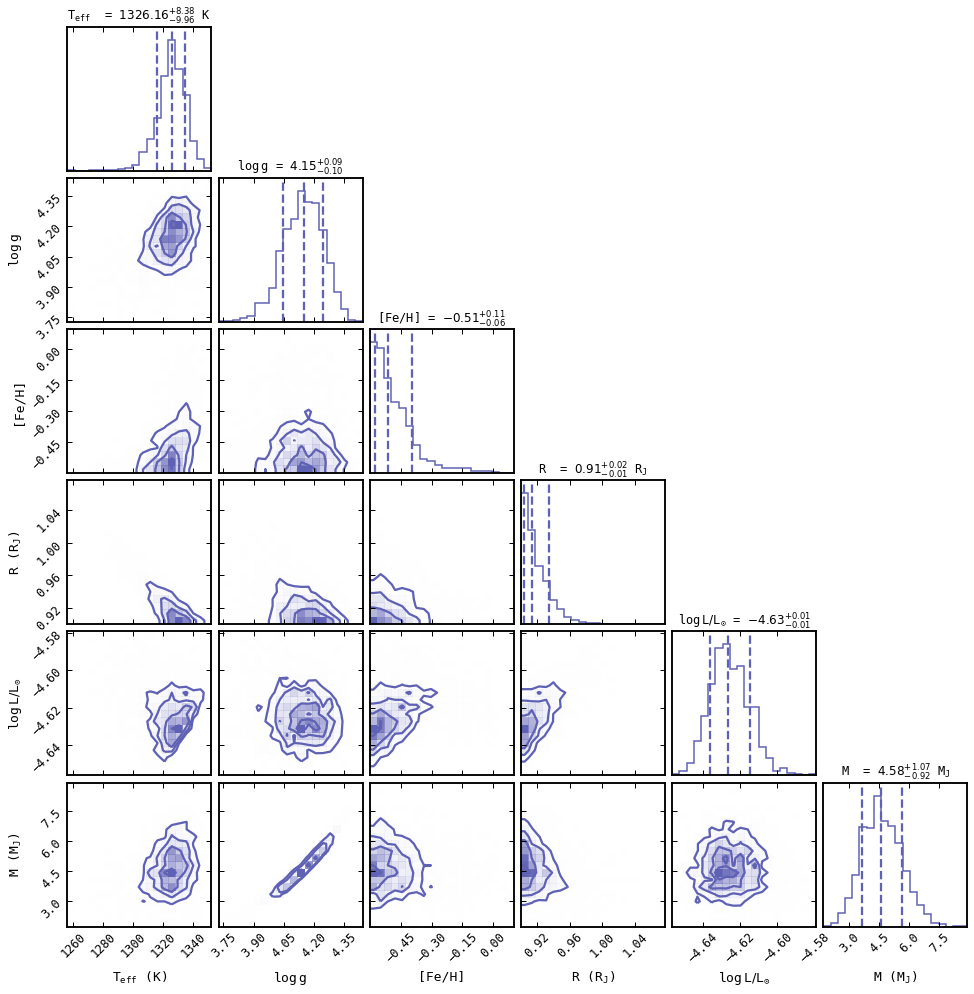

In [53]:
# generate a plot of the posterior distribution
figure_prefix = './'
species.plot_posterior(tag=tag,
                       offset=(-0.3 , -0.3),
                       title_fmt=['.2f', '.2f', '.2f', '.2f', '.2f','.2f',],
                       inc_luminosity=True,
                       inc_mass=True,
                       output=figure_prefix+'yses1c-'+model_name+'-posterior.png')

from IPython.display import Image
Image(figure_prefix+'yses1c-'+model_name+'-posterior.png')


In [54]:
# we want to grab some of these spectra 
samples = database.get_mcmc_spectra(tag=tag,
                                    random=30,
                                    wavel_range=None,
                                    spec_res=500.)

Getting MCMC spectra: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 85.99it/s]


In [55]:
# and the best fitting spectrum parameters
best = database.get_median_sample(tag=tag)

In [56]:
# we get the models
read_model = species.ReadModel(model=model_name,
                               wavel_range=None)

In [57]:
# we then generate the model with the best fitting parameters
modelbox = read_model.get_model(model_param=best,
                                spec_res=500.,
                                smooth=True)


In [58]:
# we get the info from the target
objectbox = database.get_object(object_name='TYC 8988 C',
                                inc_phot=True,
                                inc_spec=True)
objectbox = species.update_objectbox(objectbox=objectbox,
                                   model_param=best)

Getting object: TYC 8988 C... [DONE]


In [59]:
# we generate residual photometry to the best fit spectrum
residuals = species.get_residuals(datatype='model',
                                  spectrum=model_name,
                                  parameters=best,
                                  objectbox=objectbox,
                                  inc_phot=True,
                                  inc_spec=False)

Calculating synthetic photometry... [DONE]
Calculating residuals... [DONE]
Residuals (sigma):
   - Paranal/NACO.Lp: -0.71
   - Paranal/SPHERE.IRDIS_B_H: -0.19
   - Paranal/SPHERE.IRDIS_D_H23_2: -0.56
   - Paranal/SPHERE.IRDIS_D_H23_3: 2.04
   - Paranal/SPHERE.IRDIS_D_J23_2: -0.11
   - Paranal/SPHERE.IRDIS_D_J23_3: 0.27
   - Paranal/SPHERE.IRDIS_D_K12_1: -2.03
   - Paranal/SPHERE.IRDIS_D_K12_2: 1.20
   - Paranal/SPHERE.IRDIS_D_Y23_3: 0.52


In [60]:
# and synthetic photometry points in each bin for the best fit
synphot = species.multi_photometry(datatype='model',
                                   spectrum=model_name,
                                   filters=objectbox.filters,
                                   parameters=best)

Calculating synthetic photometry... [DONE]


Plotting spectrum: ./yses1c-drift-phoenix-spectrum.png... [DONE]


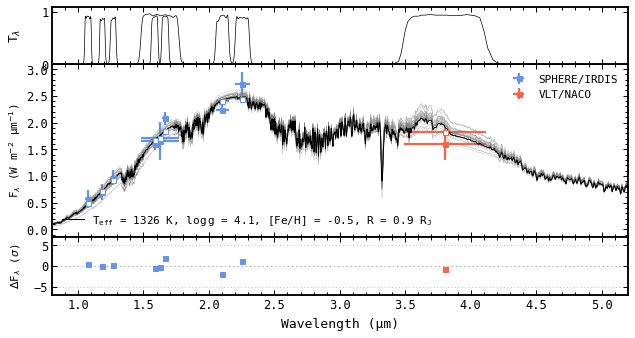

In [61]:
# this is the big cell, we plot the ensemble of the spectral info on the planet
species.plot_spectrum(boxes=[samples, modelbox, objectbox, synphot],
                      filters=objectbox.filters,
                      residuals=residuals,
                      # this dictionary describes the color and shape of all the plot components
                      plot_kwargs=[{'ls': '-', 'lw': 0.2, 'color': 'gray'}, # first the samples (thin grey lines)
                                   {'ls': '-', 'lw': 1., 'color': 'black'}, # then the best fit model (black line)
                                   { # then the photometry (I colored the NACO point red, and the IRDIS points blue, and made them all squares)
                                    'Paranal/NACO.Lp':{'marker': 's', 'ms': 5., 'color': 'tomato', 'ls': 'none', 'label': 'VLT/NACO'},
                                    'Paranal/SPHERE.IRDIS_B_H':{'marker':'s', 'ms':5, 'color':'cornflowerblue', 'ls':'none'},
                                    'Paranal/SPHERE.IRDIS_D_H23_2':{'marker':'s', 'ms':5, 'color':'cornflowerblue', 'ls':'none', 'label':'SPHERE/IRDIS'},
                                    'Paranal/SPHERE.IRDIS_D_H23_3':{'marker':'s', 'ms':5, 'color':'cornflowerblue', 'ls':'none'},
                                    'Paranal/SPHERE.IRDIS_D_J23_2':{'marker':'s', 'ms':5, 'color':'cornflowerblue', 'ls':'none'},
                                    'Paranal/SPHERE.IRDIS_D_J23_3':{'marker':'s', 'ms':5, 'color':'cornflowerblue', 'ls':'none'},
                                    'Paranal/SPHERE.IRDIS_D_K12_1':{'marker':'s', 'ms':5, 'color':'cornflowerblue', 'ls':'none'},
                                    'Paranal/SPHERE.IRDIS_D_K12_2':{'marker':'s', 'ms':5, 'color':'cornflowerblue', 'ls':'none'},
                                    'Paranal/SPHERE.IRDIS_D_Y23_3':{'marker':'s', 'ms':5, 'color':'cornflowerblue', 'ls':'none'},
                                    },
                                    None], # and finally the synthetic photometry. I put none here so that it defaults to black empty square points
                      xlim=(0.8, 5.2), # xlimits
#                       ylim=(-1.15e-15, 1.15e-14), # ylimits 
                      ylim_res=(-7., 7.), # limits on the residual y axis
                      scale=('linear', 'linear'), # can also set either axis to 'log'
                      offset=(-0.4, -0.05),
                      legend=[{'loc': 'lower left', 'frameon': False, 'fontsize': 11.}, # place the legend 
                              {'loc': 'upper right', 'frameon': False, 'fontsize': 11.}],
                      figsize=(8., 4.), # set the shape and size of the plot
                      quantity='flux density', # set the units
                      output=figure_prefix+'yses1c-'+model_name+'-spectrum.png') # save the figure
# now plot it in your notebook:
Image(figure_prefix+'yses1c-'+model_name+'-spectrum.png')

# FIN

In the next notebook, I hope to show how to sample a predicted spectrum from this suite of models fit to photometry (useful for proposals) and then import and refit the spectrum to see how it improves the determination of model parameters. 